# Проект по Линейной алгебре

## Защита персональных данных клиентов

**Описание проекта**
* Вам нужно защитить данные клиентов страховой компании «Хоть потоп». 
* Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. 
* Обоснуйте корректность его работы.
* Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. 
* Подбирать наилучшую модель не требуется.

**План работы**
1. **Загрузка данных**
2. **Умножение матриц**
3. **Алгоритм преобразования**
4. **Проверка алгоритма**
5. **Общий вывод:**

## 1.Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
sns.set(style="darkgrid")
import os

In [2]:
pth1 = 'C:/Users/copok/Documents/Проекты/Яндекс Практикум/10 Линейная алгебра/insurance.csv'
pth2 = '/datasets/insurance.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df= pd.read_csv(pth2)
else:
    print('Something is wrong')

In [3]:
def first_view(df):
    df.info()
    display(df.head(10))
    print('Количество дублированных строк:', sum(df.duplicated()))
    return display(df.isnull().sum())

In [4]:
first_view(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


Количество дублированных строк: 153


Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

* Данные соответствуют описанию. Пропусков нет.
* Есть 153 дубликата(3%) оставим как есть это недалжно повлиять на работу.


**Построим гистограммы, чтобы увидеть распределения по признакам.** 

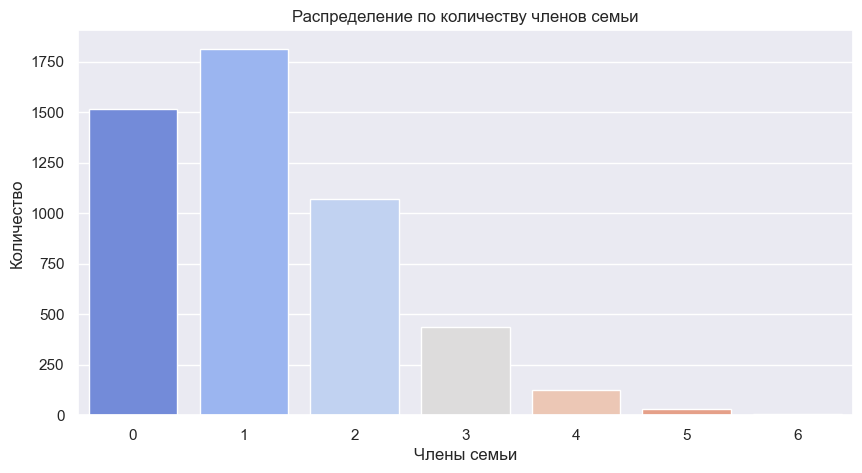

In [5]:
sns.set()
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='Члены семьи', data=df, palette='coolwarm')
ax.set_title('Распределение по количеству членов семьи')
plt.ylabel('Количество');

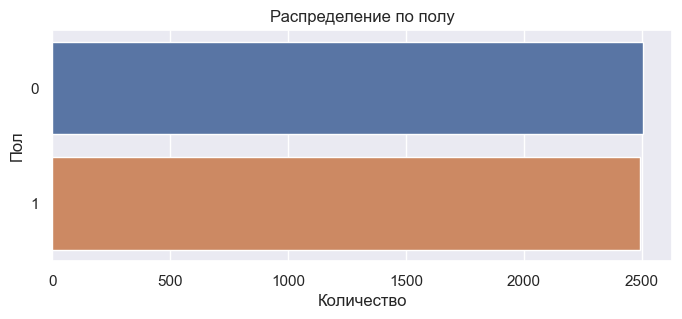

In [6]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.countplot(y='Пол', data=df)
ax.set_title('Распределение по полу')
plt.xlabel('Количество');

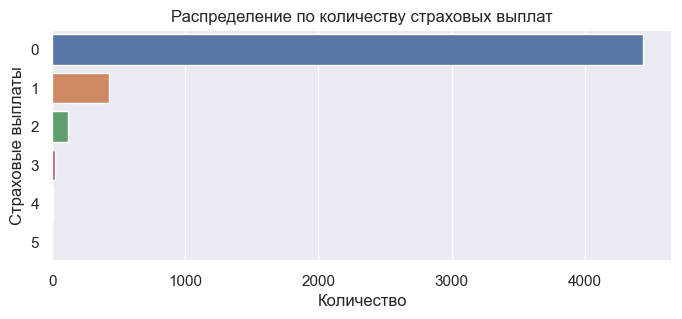

In [7]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.countplot(y='Страховые выплаты', data=df)
ax.set_title('Распределение по количеству страховых выплат')
plt.xlabel('Количество');

C:\Users\copok\AppData\Local\Temp\ipykernel_4244\2950593471.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Возраст'], bins=len(df['Возраст'].unique()))


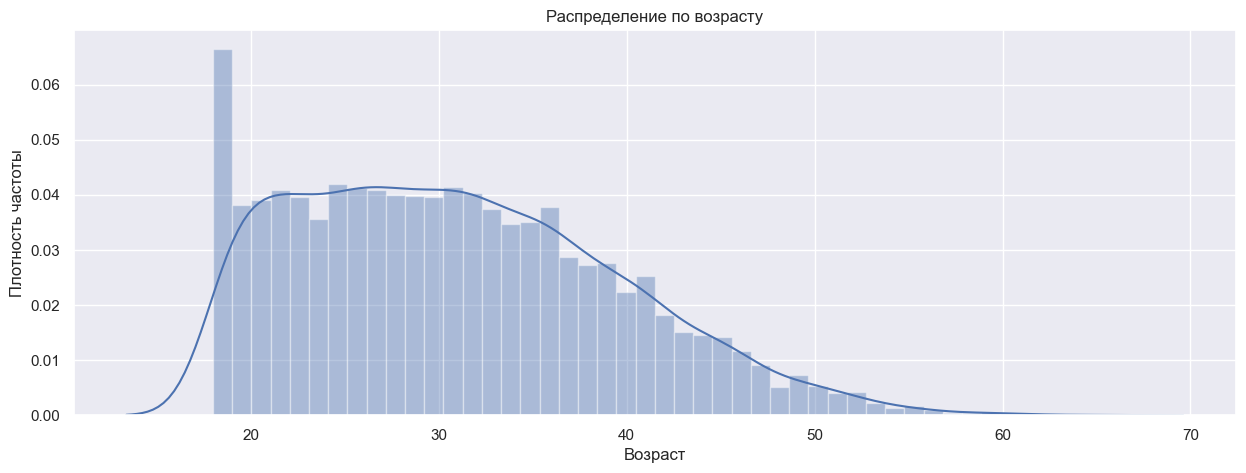

In [8]:
sns.set()
fig, ax = plt.subplots(figsize=(15, 5))
sns.distplot(df['Возраст'], bins=len(df['Возраст'].unique()))
ax.set_title('Распределение по возрасту')
plt.ylabel('Плотность частоты');

C:\Users\copok\AppData\Local\Temp\ipykernel_4244\2113733624.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Зарплата'])


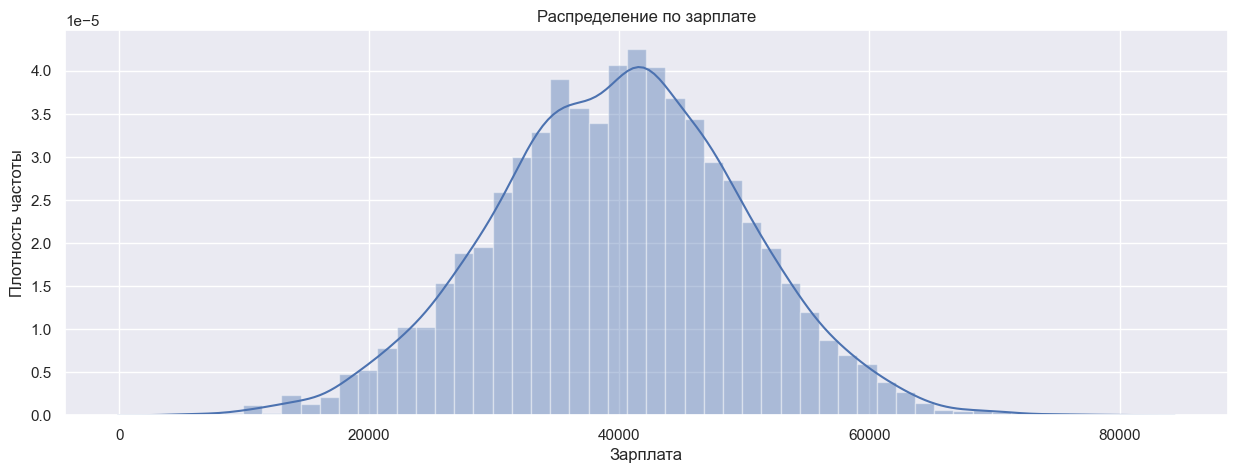

In [9]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.distplot(df['Зарплата'])
ax.set_title('Распределение по зарплате')
plt.ylabel('Плотность частоты');

* Признаки распределены без аномалий
* Данные готовы для дальнейших исследований

## 2.Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

### **Умножение признаков на обратимую матрицу, изменится ли качество лин. регрессии?**

**Ответ:** Не изменится.

**Обоснование:**

Предсказания:
$$
a = Xw
$$

Задача обучения:
$$
w = \arg\min_w MSE(Xw, y)
$$

 
Формула обучения:
$$
w = (X^T X)^{-1} X^T y
$$
Вместо **X** подставим **XP**, где **P** - обратимая квадратная матрица со случайными числами.
$$
Z = XP
$$
$$
w(Z) = ((XP)^{T}XP)^{-1}(XP)^{T}y
$$
Используем формулу:
$$
(AB)^{T} = B^{T}A^{T}
$$
$$
w(Z) = (P^{T}X^{T}XP)^{-1}P^{T}X^{T}y
$$

Используем формулу(она работает для квадратных обратимых матриц):
$$
(AB)^{-1} = B^{-1}A^{-1}
$$

Обращаем внимание что $$P^{T},X^{T},X,P$$  
**являются квадратными.**

 Преобразуем то что в скобке.
 
 $$ w(Z)= P^{-1}(P^{T}X^{T}X)^{-1}P^{T}X^{T}y$$
 $$ w(Z) = P^{-1}(X^{T}X)^{-1}(P^{T})^{-1}P^{T}X^{T}y$$
 
Помним также что умножение матрицы на обратную матрицу равно единичной матрице, а умножение любой матрицы на единичную равно этой самой матрице.

$$ w(Z) = P^{-1}(X^{T}X)^{-1}X^{T}y$$

Подставим w(Z) в формулу предсказаний.

$$ a(Z) = XPP^{-1}(X^{T}X)^{-1})X^{T}y$$
$$ a(Z) = X(X^{T}X)^{-1}X^{T}y$$

**Результат не изменился, что и требовалось доказать.**

#### Вывод


Мы доказали с помощью матричных преобразований что предсказания линейной регресии при умножении матрицы признаков на другую матрицу (с размерностью 4x4, так как нам требуется в итоге матрица 5000x4) не изменятся.

## 3.Алгоритм преобразования

**Алгоритм**

Умножим матрицу признаков на матрицу **4x4**, так как количество столбцов матрицы **A** должно быть равно количеству строк матрицы **B** при умножении, а матрица полученная после умножения будет иметь количество строк матрицы **A** и количество столбцов матрицы**B**.

Саму матрицу **B** сгенерируем с помощью метода библиотеки **`numpy np.random.normal()`**, где первый аргумент среднее нормального распределения, второй стандартное отклонение, третий - размерность матрицы.

**Обоснование**

**Создадим переменные для признаков и целевого признака.**

In [10]:
# <создадим переменные для признаков и целевого признака>
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']

**Создадим обратимую квадратную матрицу со случайными числами размерностью 4x4, умножим наши признаки на нее и полученную матрицу сделаем датафреймом.**

In [11]:
random_matrix = np.random.normal(size=(4, 4))
features_transformed = pd.DataFrame(features.values @ random_matrix, index = features.index, columns = features.columns)
features_transformed

,Пол,Возраст,Зарплата,Члены семьи
0,41682.843074,-22876.614494,89854.564699,25046.808453
1,31914.767172,-17536.851314,68855.772184,19207.160383
2,17632.121066,-9693.670086,38054.700386,10618.127861
3,35062.423768,-19226.238830,75532.151112,21043.536010
4,21925.054413,-12040.956144,47287.495603,13186.499880
...,...,...,...,...
4995,30003.964476,-16465.977365,64674.503134,18027.793392
4996,44048.566016,-24164.417592,94918.876413,26450.597577
4997,28500.111047,-15631.715279,61407.215883,17111.171731
4998,27487.805681,-15077.953035,59236.470131,16508.924086


**Проверим что матрица обратима.**

In [12]:
np.linalg.inv(random_matrix)

array([[-0.37045393, -0.79436202, -0.34122551,  0.76951383],
       [ 0.52528503,  0.07204104,  0.05270275,  0.31912224],
       [ 0.45470866,  0.51560894,  1.07776978, -0.74242965],
       [-0.53493175, -0.46031791, -1.27016679,  1.67432932]])

#### Вывод

Мы преобразовали признаки и в следующем шаге проверим что метрика качества линейной регресии не изменится после преобразований.

## 4.Проверка алгоритма

**Проверим качество линейной регресии на непреобразованных данных:**

In [13]:
# <Создадим модель лин. регрессии>
model = LinearRegression().fit(features, target)

# <обучаем модель> 
predictions = model.predict(features)

# <метрика качества коэффициент детерминации>
print('R2 на исходных признаках:','{:.4f}'.format(r2_score(target,predictions)))

R2 на исходных признаках: 0.4249


**Проверим качество линейной регресии на преобразованных данных:**

In [14]:
# <Создадим модель лин. регрессии>
model = LinearRegression().fit(features_transformed, target)

# <обучаем модель> 
predictions = model.predict(features_transformed)

# <метрика качества коэффициент детерминации>
print('R2 на преобразованных признаках:','{:.4f}'.format(r2_score(target,predictions)))

R2 на преобразованных признаках: 0.4249


**Качество модели по двум наборам признаков совпадает.**

## 5.Общий вывод:

Проведенные исследования позволили сделать следующие выводы:

* Умножив признаки на обратимую матрицу, качество линейной регрессии не меняется. Это обусловленно тем, что **Веса** изменились под новые значения, т.е. признаки исходной матрицы и преобразованной выражаются через коэффициенты(**веса w**), поэтому качество линейной регресии не изменилось

* Качество метрики **R2** для 2 матриц признаков: до преобразования и после **равны**.